In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table, vstack, join
from glob import glob
from tqdm import tqdm

In [46]:
import bokeh.plotting as bp

In [47]:
bp.figure?

Init signature: bp.figure(*arg, **kw) -> 'None'
Docstring:     
Create a new figure for plotting.

A subclass of |Plot| that simplifies plot creation with default axes, grids,
tools, etc.

Figure objects have many glyph methods that can be used to draw
vectorized graphical glyphs:

.. hlist::
    :columns: 3

    * :func:`~bokeh.plotting.figure.annular_wedge`
    * :func:`~bokeh.plotting.figure.annulus`
    * :func:`~bokeh.plotting.figure.arc`
    * :func:`~bokeh.plotting.figure.asterisk`
    * :func:`~bokeh.plotting.figure.bezier`
    * :func:`~bokeh.plotting.figure.circle`
    * :func:`~bokeh.plotting.figure.circle_cross`
    * :func:`~bokeh.plotting.figure.circle_dot`
    * :func:`~bokeh.plotting.figure.circle_x`
    * :func:`~bokeh.plotting.figure.circle_y`
    * :func:`~bokeh.plotting.figure.cross`
    * :func:`~bokeh.plotting.figure.dash`
    * :func:`~bokeh.plotting.figure.diamond`
    * :func:`~bokeh.plotting.figure.diamond_cross`
    * :func:`~bokeh.plotting.figure.diamond_dot

In [2]:
test = np.zeros((100,50,50))

In [3]:
rang = np.linspace(0,10,100)

In [4]:
test[:,0,0] = rang

In [2]:
datadir = "data/NGC4030/mcmc/NGC4030-SQUARE0.6/BETA-CORR/"

In [10]:
cubepath = "data/NGC4030/cube/NGC4030-SQUARE0.6/BETA-CORR/SQUARE0.6-MILESHC-MASTARHC2-NOISM/1/1/manga-1-1-LOGCUBE-SQUARE0.6-MILESHC-MASTARHC2-NOISM.fits"
mappath = "data/NGC4030/cube/NGC4030-SQUARE0.6/BETA-CORR/SQUARE0.6-MILESHC-MASTARHC2-NOISM/1/1/manga-1-1-MAPS-SQUARE0.6-MILESHC-MASTARHC2-NOISM.fits"

In [11]:
cube = fits.open(cubepath)
Map = fits.open(mappath)

In [16]:
mcmc_fils = glob(f"{datadir}/**/*.fits",recursive=True)

In [46]:
l = 0
for i in range(len(tables)):
    l += len(tables[i])

l

11255

In [50]:
cube = fits.open(cubepath)
binid = cube['BINID'].data[0]

table = None
for i,fil in enumerate(tqdm(mcmc_fils, desc= "Combining Tables")):
    data = fits.open(fil)
    data_table = Table(data[1].data)
    data_table.remove_columns(['samples','percentiles'])
    data_table['id'] = np.arange(len(data_table))
    if i == 0:
        table = data_table
        continue
    table = join(table, data_table, join_type='outer')

Combining Tables: 100%|█████████████████████████| 17/17 [01:04<00:00,  3.80s/it]


# EW map

In [14]:
flux = cube['FLUX'].data
wave = cube['WAVE'].data
ivar = cube['IVAR'].data
model = cube['MODEL'].data
binid = Map['BINID'].data[0]
stellarvel = Map['STELLAR_VEL'].data

z_guess=0.01

In [22]:
inds

(array([162, 162, 163, 163, 163, 164, 164, 164]),
 array([160, 161, 159, 160, 161, 159, 160, 161]))

In [30]:
bins = np.random.rand(10,10)

In [33]:
w = bins > 0.8

In [41]:
arr =  np.zeros((100,10,10))
values = np.random.rand(100)

inds = (np.array([2,3,4,5]), np.array([5,6,7,8]))

for y,x in zip(inds[0],inds[1]):
    arr[np.arange(100),y,x] = values

In [45]:
arr[:,3,6]

array([0.58887996, 0.40685785, 0.39410248, 0.02175126, 0.02606358,
       0.62225853, 0.92211122, 0.82374667, 0.25184969, 0.57984596,
       0.23527353, 0.58933369, 0.35719365, 0.00972674, 0.6683072 ,
       0.64426263, 0.20634349, 0.40830759, 0.09236087, 0.80042608,
       0.95648956, 0.75661247, 0.04089783, 0.48817994, 0.487328  ,
       0.32886068, 0.14448527, 0.40060692, 0.84537462, 0.57791486,
       0.40001358, 0.56727548, 0.20909275, 0.66084347, 0.60551182,
       0.4816457 , 0.96200879, 0.9144578 , 0.98972012, 0.18494814,
       0.55297962, 0.74219815, 0.50470365, 0.658662  , 0.97905935,
       0.49448148, 0.83455744, 0.85054419, 0.33697375, 0.54434909,
       0.71313987, 0.94401403, 0.52641143, 0.59375145, 0.54008943,
       0.791435  , 0.69079203, 0.91043655, 0.05495296, 0.77014442,
       0.88122104, 0.62501521, 0.10525275, 0.74810264, 0.28741016,
       0.30972455, 0.86807274, 0.24426208, 0.66201271, 0.23705285,
       0.81678629, 0.36783443, 0.24672001, 0.05048244, 0.57330

In [26]:
arr[:,inds[0],inds[1]]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


In [17]:
l, ny, nx = flux.shape
ewmap = np.zeros((ny,nx))
wavecube = np.zeros(flux.shape)
uniqids = np.unique(binid)
c = 2.998e5
for ID in uniqids[1:]:
    inds = np.where(binid == ID)
    w = binid == ID
    
    ## get the stellar velocity of the bin
    sv = stellarvel[w][0]
        
    ## Calculate redshift
    z = (sv * (1+z_guess))/c + z_guess

    # shift wavelengths to restframe
    restwave = wave / (1+z)
    wavecube[np.arange(len(restwave)),inds[0],inds[1]] = restwave

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (4009,) (8,) (8,) 

In [ ]:
def make_EW_map(cubefil,mapfil,z_guess,savepath,vmin=-0.2,vmax=4,bad_bins=False,show_warnings=True):
    c = 2.998e5
    
    if isinstance(z_guess, str):
        z_guess = float(z_guess)
        
    if bad_bins:
        bbins=[]
        
    cube = fits.open(cubefil)
    Map = fits.open(mapfil)
    
    flux = cube['FLUX'].data
    wave = cube['WAVE'].data
    ivar = cube['IVAR'].data
    model = cube['MODEL'].data
    
    stellarvel = Map['STELLAR_VEL'].data
    binid = Map['BINID'].data[0]
    uniqids = np.unique(binid)
    
    region = 5880, 5910
    
    
    l, ny, nx = flux.shape
    ewmap = np.zeros((ny,nx))
    wavecube = np.zeros(flux.shape)

    logging.info('Constructing equivalent width map.')
    for ID in uniqids[1:]:
        inds = np.where(binid == ID)
        w = binid == ID

        ## get the stellar velocity of the bin
        sv = stellarvel[w][0]
            
        ## Calculate redshift
        z = (sv * (1+z_guess))/c + z_guess

        # shift wavelengths to restframe
        restwave = wave / (1+z)
        wavecube[np.arange(len(restwave)),inds[0],inds[1]] = restwave

        # define wavelength boundaries and slice flux, model, and wavelength arrays
        inbounds = np.where((restwave>region[0]) & (restwave<region[1]))[0]
        Lam = restwave[inbounds]
        fluxbound = flux[inbounds,:,:]
        modelbound = model[inbounds,:,:]       

        ## check the flux and model in the bin
        
        # slice the flux/model to just those in the current bin
        fluxbin = fluxbound[:,inds[0],inds[1]]
        modelbin = modelbound[:,inds[0],inds[1]]

        if abs(sv) > 4 * np.std(stellarvel):
            if show_warnings:
                warnings.warn(f"Stellar velocity in Bin ID {ID} beyond 4 standard deviations. Bin {ID} EW set to Nan",UserWarning,
                             stacklevel=2)
            ewmap[w] = np.nan
            if bad_bins:
                bbins.append(ID)
            continue

        # make sure flux is identical throughout the bin
        if not np.all(fluxbin == fluxbin[:,0][:,np.newaxis]):
            if show_warnings:
                warnings.warn(f"Fluxes in Bin {ID} are not identical. Bin {ID} EW set to NaN",UserWarning,
                             stacklevel=2)
            ewmap[w] = np.nan
            if bad_bins:
                bbins.append(ID)
            continue
            
        # repeat comparison for the model
        if not np.all(modelbin == modelbin[:,0][:,np.newaxis]):
            if show_warnings:
                warnings.warn(f"Stellar models in Bin {ID} not identical. Bin {ID} EW set to NaN",UserWarning,
                             stacklevel=2)
            ewmap[w] = np.nan
            if bad_bins:
                bbins.append(ID)
            continue
         
        F = fluxbin[:,0]
        M = modelbin[:,0]
        
        if not all(F>=0) or not all(M>=0):
            if show_warnings:
                warnings.warn(f"Flux or model arrays in Bin {ID} contain values < 0. Logging Bin ID.", UserWarning,
                             stacklevel=2)
            #ewmap[w] = np.nan
            if bad_bins:
                bbins.append(ID)
            #continue
            
            
        # create dlambda array
        dLam = np.diff(Lam)
        dLam = np.insert(dLam, 0, dLam[0])
        
        # exclude models equal to zero to avoid nan in calculation
        nonzero = (M != 0) & (F != 0)
        cont = np.ones(np.sum(nonzero))
        W = np.sum( (cont - (F[nonzero])/M[nonzero]) * dLam[nonzero] )
        ewmap[w] = W
    
    logging.info('Creating plots.')
    
    flatew = ewmap.flatten()
    w = (flatew != 0) & (np.isfinite(flatew))
    flatewcleaned = flatew[w]
    
    bin_width = 3.5 * np.std(flatewcleaned) / (flatewcleaned.size ** (1/3))
    nbins = (max(flatewcleaned) - min(flatewcleaned)) / bin_width
    
    plt.hist(flatewcleaned,bins=int(nbins),color='k')
    plt.xlim(-5,5)
    plt.xlabel(r'$\mathrm{EW_{Na\ I}\ (\AA)}$')
    plt.ylabel(r'$N_{\mathrm{spax}}$')
    
    im2name = f"{args.galname}-EW_distribution.png"
    output = os.path.join(savepath,im2name)
    plt.savefig(output,bbox_inches='tight',dpi=150)
    logging.info(f"EW distriubtion plot saved to {output}")
    plt.close()
    
    
    plotmap = np.copy(ewmap)
    plotmap[(plotmap==0) | (plotmap>vmax) | (plotmap<vmin)] = np.nan
    
    nvmax = np.median(plotmap[np.isfinite(plotmap)]) + np.std(plotmap[np.isfinite(plotmap)])
    if vmax < nvmax:
        vmax = np.round(nvmax)
 
    plt.imshow(plotmap,origin='lower',cmap='rainbow',vmin=vmin,vmax=vmax,
           extent=[32.4, -32.6,-32.4, 32.6])
    plt.colorbar(label=r'$\mathrm{EW_{Na\ I}\ (\AA)}$',fraction=0.0465, pad=0.01)
    plt.gca().set_facecolor('lightgray')
    plt.xlabel(r'$\Delta \alpha$ (arcsec)')
    plt.ylabel(r'$\Delta \delta$ (arcsec)')
    
    im1name = f"{args.galname}-EW_map.png"
    output = os.path.join(savepath,im1name)
    plt.savefig(output,bbox_inches='tight',dpi=200)
    logging.info(f"EW map plot saved to {output}")
    plt.close()
    
    if args.bokeh:
        logging.info("Creating BOKEH plot.")
        keyword = f"{args.galname}-EW-bokeh"
        make_bokeh_map(flux, model, ivar, wavecube, ewmap, binid, savepath, keyword)


    if bad_bins:
        return ewmap, bbins
    
    return ewmap

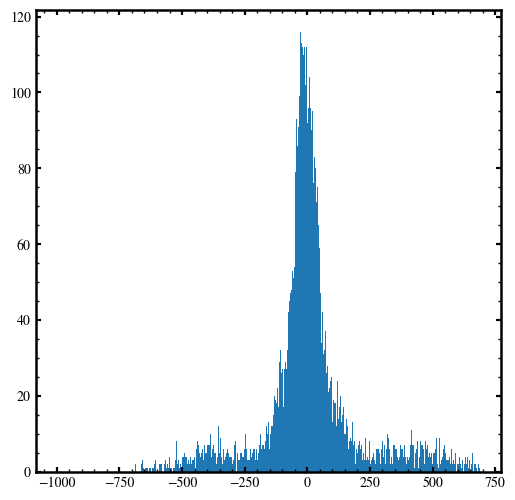

In [71]:
plt.hist(table['velocities'],bins=1000);

In [60]:
bins,inds = np.unique(table['bin'],return_index=True)

In [64]:
binid = cube['BINID'].data[0]

In [65]:
vmap = np.zeros(binid.shape)
for ID,ind in zip(bins,inds):
    w = binid == ID
    vmap[w] = table['velocities'][ind]

In [66]:
plt.style.use('figures.mplstyle')

In [78]:
round(np.std(table['velocities']),ndigits=-1)

210.0

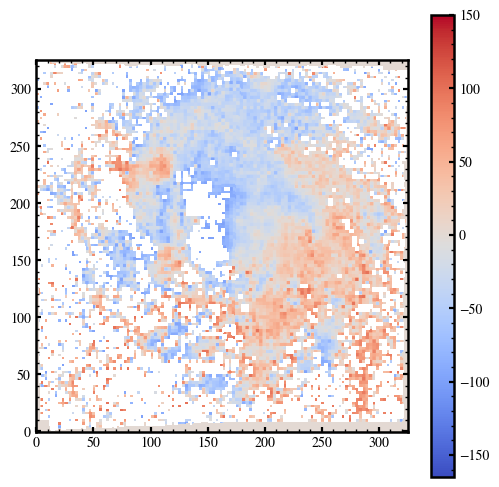

In [85]:
w = (vmap>100) | (vmap<-100)
vmap[w] = np.nan
plt.imshow(vmap,cmap='coolwarm',vmin=150,vmax=-150,origin='lower')
plt.colorbar()

In [92]:
testdir = "/Users/apitts4030/Repo/NaI_analysis/data/NGC4030/cube/BETA-CORR/"
testglob = glob(f"{testdir}/**/*.fits",recursive=True)
testglob

[]

In [93]:
testdir = "/Users/apitts4030/Repo/NaI_analysis/data/NGC4030/cube/NGC4030-SQUARE0.6/BETA-CORR/"

In [94]:
fils = glob(os.path.join(testdir,"**","*.fits"),recursive=True)

In [97]:
for fil in fils:
    if "MAPS" in fil:
        mapfil = fil

In [99]:
Map = fits.open(mapfil)

In [106]:
Map.info()

Filename: /Users/apitts4030/Repo/NaI_analysis/data/NGC4030/cube/NGC4030-SQUARE0.6/BETA-CORR/SQUARE0.6-MILESHC-MASTARHC2-NOISM/1/1/manga-1-1-MAPS-SQUARE0.6-MILESHC-MASTARHC2-NOISM.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1384   ()      
  1  SPX_SKYCOO    1 ImageHDU        44   (326, 326, 2)   float32   
  2  SPX_ELLCOO    1 ImageHDU        49   (326, 326, 4)   float32   
  3  SPX_MFLUX     1 ImageHDU        36   (326, 326)   float32   
  4  SPX_MFLUX_IVAR    1 ImageHDU        37   (326, 326)   float32   
  5  SPX_SNR       1 ImageHDU        34   (326, 326)   float32   
  6  BINID         1 ImageHDU        46   (326, 326, 5)   int32   
  7  BIN_LWSKYCOO    1 ImageHDU        44   (326, 326, 2)   float32   
  8  BIN_LWELLCOO    1 ImageHDU        49   (326, 326, 4)   float32   
  9  BIN_AREA      1 ImageHDU        35   (326, 326)   float32   
 10  BIN_FAREA     1 ImageHDU        34   (326, 326)   float32   
 11  BIN_MFLUX     1 I

In [113]:
Map['EMLINE_SFLUX'].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  326                                                  
NAXIS2  =                  326                                                  
NAXIS3  =                   35                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =      168.69830612546 / Pixel coordinate of reference point            
CRPIX2  =      162.60512922633 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
PC1_1   = -5.5555555555556E-

In [91]:
import os
os.path.dirname(os.path.abspath('maps'))

'/Users/apitts4030/Repo/NaI_analysis'

In [114]:
import astropy.units as u

test = 100 * u.m

In [ ]:
dtype = []
dtype.append( ('OIII/HB', list) )
dtype.append( ('NII/HA', list) )
dtype.append( ('SII/HA', list) )
dtype.append( ('OI/HA', list) )
dtype.append( ('') )

In [123]:
emlines = Map['EMLINE_SFLUX'].data
ivars = Map['EMLINE_SFLUX_IVAR'].data
binid = Map['BINID'].data[0]


ha = emlines[23]
hb = emlines[14]

oiii = emlines[15] #oiii 4690
#oiii = emlines[16] #oiii 5007 

oiii_hb = oiii/hb

sii = emlines[25] # sii 6718
#sii = emlines[26] # sii 6732

sii_ha = sii/ha

oi = emlines[20] # oi 6302
#oi = emlines[21] # oi 6365

oi_ha = oi/ha

nii = emlines[22] # nii 6549
#nii = emlines[24] # nii 6585

nii_ha = nii/ha

fake_niiha = np.linspace(np.min(nii_ha),np.max(nii_ha),10000)
fake_siiha = np.linspace(np.min(sii_ha),np.max(sii_ha),10000)
fake_oiha = np.linspace(np.min(oi_ha),np.max(oi_ha),10000)

/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/4175704624.py:12: RuntimeWarning: invalid value encountered in divide
  oiii_hb = oiii/hb
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/4175704624.py:17: RuntimeWarning: divide by zero encountered in divide
  sii_ha = sii/ha
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/4175704624.py:17: RuntimeWarning: invalid value encountered in divide
  sii_ha = sii/ha
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/4175704624.py:22: RuntimeWarning: divide by zero encountered in divide
  oi_ha = oi/ha
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/4175704624.py:22: RuntimeWarning: invalid value encountered in divide
  oi_ha = oi/ha
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/4175704624.py:27: RuntimeWarning: invalid value encountered in divide
  nii_ha = nii/ha


In [140]:
def demarcation2(ratio):
    w = np.isfinite(ratio)
    fake_ratio = np.linspace(np.min(ratio[w]),np.max(ratio[w]),1000)
    demarc_line = 0.61 / np.log10((fake_ratio) - 0.05) + 1.3

    return np.log10(fake_ratio), np.log10(demarc_line)

In [124]:
def demarcation(ratio):
    return 0.61 / np.log10((ratio) - 0.05) + 1.3

In [ ]:
def setup_elrs(emlines):
    ha = emlines[23]
    hb = emlines[14]
    oiii = emlines[15] #oiii 4690
    #oiii = emlines[16] #oiii 5007     
    sii = emlines[25] # sii 6718
    #sii = emlines[26] # sii 6732
    oi = emlines[20] # oi 6302
    #oi = emlines[21] # oi 6365
    nii = emlines[22] # nii 6549
    #nii = emlines[24] # nii 6585
    global sii_ha = sii/ha
    global oiii_hb = oiii/hb    
    global oi_ha = oi/ha
    global nii_ha = nii/ha
    
    ELRs = []

/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/3888483919.py:2: RuntimeWarning: invalid value encountered in log10
  ax[0].plot(np.log10(nii_ha.flatten()),np.log10(oiii_hb.flatten()),'v')
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/3888483919.py:2: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(np.log10(nii_ha.flatten()),np.log10(oiii_hb.flatten()),'v')
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/1262710901.py:4: RuntimeWarning: invalid value encountered in log10
  demarc_line = 0.61 / np.log10((fake_ratio) - 0.05) + 1.3
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/1262710901.py:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(fake_ratio), np.log10(demarc_line)
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/3888483919.py:8: RuntimeWarning: invalid value encountered in log10
  ax[1].plot(np.log10(sii_ha.flatten()),np.log10(oiii_hb.flatten()), 'v')
/v

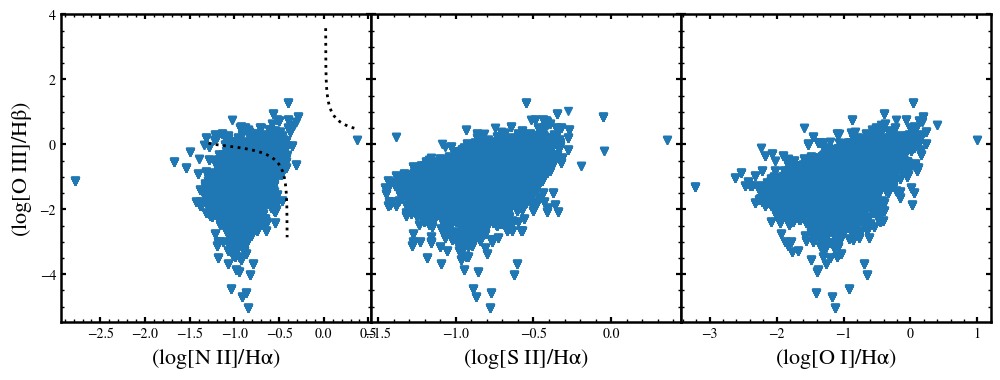

In [141]:
fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)
ax[0].plot(np.log10(nii_ha.flatten()),np.log10(oiii_hb.flatten()),'v')
ax[0].plot(line, demarc, 'k', linestyle='dotted')
ax[0].set_ylabel(r"$\mathrm{log\ ([O\ III]/H \beta)}$")
ax[0].set_xlabel(r"$\mathrm{log\ ([N\ II]/H \alpha)}$")

ax[1].plot(np.log10(sii_ha.flatten()),np.log10(oiii_hb.flatten()), 'v')
ax[1].plot(np.log10(fake_siiha), demarcation(fake_siiha), 'k', linestyle='dotted')
ax[1].set_xlabel(r"$\mathrm{log\ ([S\ II]/H \alpha)}$")

ax[2].plot(np.log10(oi_ha.flatten()),np.log10(oiii_hb.flatten()), 'v')
ax[2].plot(np.log10(fake_oiha), demarcation(fake_oiha), 'k', linestyle='dotted')
ax[2].set_xlabel(r"$\mathrm{log\ ([O\ I]/H \alpha)}$")
fig.subplots_adjust(hspace=0,wspace=0)

In [170]:
oiii_hb.shape

(326, 326)

/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/1749688364.py:7: RuntimeWarning: invalid value encountered in divide
  oiii_hb = np.log10(oiii/hb)
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/1749688364.py:7: RuntimeWarning: divide by zero encountered in log10
  oiii_hb = np.log10(oiii/hb)
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/1749688364.py:7: RuntimeWarning: invalid value encountered in log10
  oiii_hb = np.log10(oiii/hb)
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/1749688364.py:11: RuntimeWarning: divide by zero encountered in divide
  sii_ha = np.log10(sii/ha)
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/1749688364.py:11: RuntimeWarning: invalid value encountered in divide
  sii_ha = np.log10(sii/ha)
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/1749688364.py:11: RuntimeWarning: invalid value encountered in log10
  sii_ha = np.log10(sii/ha)
/var/folders/ms/1cj6

(-3.833695888519287, 1.1040496826171875)

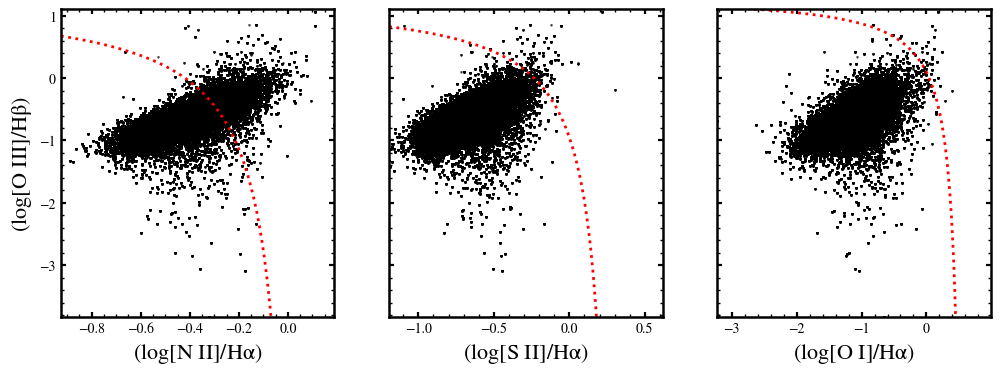

In [166]:
ha = emlines[23]
hb = emlines[14]

#oiii = emlines[15] #oiii 4690
oiii = emlines[16] #oiii 5007 

oiii_hb = np.log10(oiii/hb)

sii = emlines[25] + emlines[26] # sii 6718 + 6732

sii_ha = np.log10(sii/ha)

oi = emlines[20] # oi 6302
#oi = emlines[21] # oi 6365

oi_ha = np.log10(oi/ha)

#nii = emlines[22] # nii 6549
nii = emlines[24] # nii 6585

nii_ha = np.log10(nii/ha)

fake_niiha = np.linspace(np.min(nii_ha[np.isfinite(nii_ha)]),np.max(nii_ha[np.isfinite(nii_ha)]),1000)
fake_siiha = np.linspace(np.min(sii_ha[np.isfinite(sii_ha)]),np.max(sii_ha[np.isfinite(sii_ha)]),1000)
fake_oiha = np.linspace(np.min(oi_ha[np.isfinite(oi_ha)]),np.max(oi_ha[np.isfinite(oi_ha)]),1000)

fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)



ax[0].plot(nii_ha,oiii_hb,'v',color='k',ms=1,alpha=0.75)

demarcation = lambda log_lr: 0.61 / (log_lr - 0.05) + 1.3
classification = demarcation(fake_niiha)
w = fake_niiha < 0.05
ax[0].plot(fake_niiha[w], classification[w], color='r', linestyle='dotted')
ax[0].set_ylabel(r"$\mathrm{(log[O\ III]/H \beta)}$")
ax[0].set_xlabel(r"$\mathrm{(log[N\ II]/H \alpha)}$")
ax[0].set_xlim(np.min(nii_ha[np.isfinite(nii_ha)]),np.max(nii_ha[np.isfinite(nii_ha)]))
ax[0].set_ylim(np.min(oiii_hb[np.isfinite(oiii_hb)]),np.max(oiii_hb[np.isfinite(oiii_hb)]))



ax[1].plot(sii_ha,oiii_hb, 'v', color='k',ms=1,alpha=0.75)

demarcation = lambda log_lr: 0.72 / (log_lr - 0.32) + 1.3
classification = demarcation(fake_siiha)
w = fake_siiha < 0.32
ax[1].plot(fake_siiha[w], classification[w], color='r', linestyle='dotted')
ax[1].set_xlabel(r"$\mathrm{(log[S\ II]/H \alpha)}$")

ax[0].set_xlim(np.min(nii_ha[np.isfinite(nii_ha)]),np.max(nii_ha[np.isfinite(nii_ha)]))
ax[0].set_ylim(np.min(oiii_hb[np.isfinite(oiii_hb)]),np.max(oiii_hb[np.isfinite(oiii_hb)]))
ax[1].set_xlim(np.min(sii_ha[np.isfinite(sii_ha)]),np.max(sii_ha[np.isfinite(sii_ha)]))
ax[1].set_ylim(np.min(oiii_hb[np.isfinite(oiii_hb)]),np.max(oiii_hb[np.isfinite(oiii_hb)]))


ax[2].plot(oi_ha,oiii_hb, 'v', color='k', ms=1, alpha=0.75)

demarcation = lambda log_lr: 0.73 / (log_lr - 0.59) + 1.33
classification = demarcation(fake_oiha)
w = fake_oiha < 0.59
ax[2].plot(fake_oiha[w], classification[w], color='r', linestyle='dotted')
ax[2].set_xlabel(r"$\mathrm{(log[O\ I]/H \alpha)}$")


In [179]:
ys, xs = np.where(5 == binid)

In [180]:
ys

array([177, 177, 177, 178, 178, 178, 179, 179, 179])

In [181]:
xs

array([159, 160, 161, 159, 160, 161, 159, 160, 161])

In [182]:
binid[ys,xs]

array([5, 5, 5, 5, 5, 5, 5, 5, 5], dtype='>i4')

In [203]:
test = np.zeros((5,5),dtype=str)

In [204]:
test

array([['', '', '', '', ''],
       ['', '', '', '', ''],
       ['', '', '', '', ''],
       ['', '', '', '', ''],
       ['', '', '', '', '']], dtype='<U1')

In [205]:
test[1,4] = 'test'

In [218]:
def BPT(map_fil, fig_output):
    """
    Creates spaxel-level BPT diagrams for individual galaxies using DAP emissionn line flux map and a new map
    containing color-coded classifications of each spaxel. Classifications are determined by Kewley et al. 2006.
    """

    logging.info("Obtaining Maps.")
    Map = fits.open(map_fil)
    emlines = Map['EMLINE_SFLUX'].data
    binid = Map['BINID'].data[0]


    ha = emlines[23]
    hb = emlines[14]

    #oiii = emlines[15] #oiii 4690
    oiii = emlines[16] #oiii 5007 

    oiii_hb = np.log10(oiii/hb)

    sii = emlines[25] + emlines[26] # sii 6718,32

    sii_ha = np.log10(sii/ha)

    oi = emlines[20] # oi 6302
    #oi = emlines[21] # oi 6365

    oi_ha = np.log10(oi/ha)

    #nii = emlines[22] # nii 6549
    nii = emlines[24] # nii 6585

    nii_ha = np.log10(nii/ha)

    fake_niiha = np.linspace(np.min(nii_ha[np.isfinite(nii_ha)]),np.max(nii_ha[np.isfinite(nii_ha)]),10000)
    fake_siiha = np.linspace(np.min(sii_ha[np.isfinite(sii_ha)]),np.max(sii_ha[np.isfinite(sii_ha)]),10000)
    fake_oiha = np.linspace(np.min(oi_ha[np.isfinite(oi_ha)]),np.max(oi_ha[np.isfinite(oi_ha)]),10000)



    logging.info("Creating BPT ELRs plot.")
    fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)


    ax[0].plot(nii_ha,oiii_hb,'v',color='k',ms=1,alpha=0.35)

    demarcation = lambda log_lr: 0.61 / (log_lr - 0.05) + 1.3
    classification = demarcation(fake_niiha)
    w = fake_niiha < 0.05
    ax[0].plot(fake_niiha[w], classification[w], color='r')
    ax[0].set_ylabel(r"$\mathrm{(log[O\ III]/H \beta)}$")
    ax[0].set_xlabel(r"$\mathrm{(log[N\ II]/H \alpha)}$")



    ax[1].plot(sii_ha,oiii_hb, 'v', color='k',ms=1,alpha=0.35)
    
    demarcation = lambda log_lr: 0.72 / (log_lr - 0.32) + 1.3
    classification = demarcation(fake_siiha)
    w = fake_siiha < 0.32
    ax[1].plot(fake_siiha[w], classification[w], color='r')
    ax[1].set_xlabel(r"$\mathrm{(log[S\ II]/H \alpha)}$")


    ax[2].plot(oi_ha,oiii_hb, 'v', color='k',ms=1,alpha=0.35)

    demarcation = lambda log_lr: 0.73 / (log_lr - 0.59) + 1.33
    classification = demarcation(fake_oiha)
    w = fake_oiha < 0.59
    ax[2].plot(fake_oiha[w], classification[w], color='r')
    ax[2].set_xlabel(r"$\mathrm{(log[O\ I]/H \alpha)}$")


    ax[0].set_xlim(np.min(nii_ha[np.isfinite(nii_ha)]),np.max(nii_ha[np.isfinite(nii_ha)]))
    ax[0].set_ylim(np.min(oiii_hb[np.isfinite(oiii_hb)]),np.max(oiii_hb[np.isfinite(oiii_hb)]))
    ax[1].set_xlim(np.min(sii_ha[np.isfinite(sii_ha)]),np.max(sii_ha[np.isfinite(sii_ha)]))
    ax[1].set_ylim(np.min(oiii_hb[np.isfinite(oiii_hb)]),np.max(oiii_hb[np.isfinite(oiii_hb)]))
    ax[2].set_xlim(np.min(oi_ha[np.isfinite(oi_ha)]),np.max(oi_ha[np.isfinite(oi_ha)]))
    ax[2].set_ylim(np.min(oiii_hb[np.isfinite(oiii_hb)]),np.max(oiii_hb[np.isfinite(oiii_hb)]))
        #fig.set_box_aspect(0)
    fig.subplots_adjust(hspace=0,wspace=0)
    #fig.savefig(fig_output,bbox_inches='tight',dpi=300)
    logging.info(f"BPT Plot saved to {fig_output}")
    
    logging.info("Creating classification map.")
    class_map = np.zeros(binid.shape, dtype=str)

    color_map = {
        'star-forming': np.array([119, 168, 212]), # blue
        'composite': np.array([235, 235, 240]), # white
        'seyfert': np.array([250, 209, 44]), # yellow
        'liners': np.array([51, 54, 82]), # dark blue
        'unk': np.array([0, 0, 0])
    }

    data3d = np.ndarray((binid.shape[0], binid.shape[0], 3), dtype=int)  

    for ID in np.unique(binid):
        w = binid == ID
        ys, xs = np.where(binid == ID)

        elrs = {
            'oiii':np.median(oiii_hb[w]),
            'nii':np.median(nii_ha[w]),
            'sii':np.median(sii_ha[w]),
            'oi':np.median(oi_ha[w])
        }

        classification_str = classify_ELR(elrs)
        class_map[w] = classification_str
        data3d[ys, xs] = color_map[classification_str]

    return data3d

In [219]:
def classify_ELR(elr_dict):
    if (elr_dict['oiii'] < 0.61 / (elr_dict['nii'] - 0.05) + 1.3) and (elr_dict['oiii'] < 0.72/(elr_dict['sii'] - 0.32) + 1.3) and (elr_dict['oiii'] < 0.73 / (elr_dict['oi'] + 0.59) + 1.33):
        return 'star-forming'
    
    elif (elr_dict['oiii'] >  0.61 / (elr_dict['nii'] - 0.05) + 1.3) and (elr_dict['oiii'] < 0.61 / (elr_dict['nii'] - 0.47) + 1.19):
        return 'composite'
    
    elif (elr_dict['oiii'] > 0.61 / (elr_dict['nii'] - 0.47) + 1.19) and (elr_dict['oiii'] > 0.72/(elr_dict['sii'] - 0.32) + 1.3) and (elr_dict['oiii'] > 0.73 / (elr_dict['oi'] + 0.59) + 1.33):
        return 'seyfert'
    
    elif (elr_dict['oi'] > - 0.59) and (elr_dict['oiii'] > 1.89 * elr_dict['sii'] + 0.76) and (elr_dict['oiii'] > 1.18 * elr_dict['oi'] + 1.3):
        return 'seyfert'
    
    elif (elr_dict['oiii'] > 0.61 / (elr_dict['nii'] - 0.47) + 1.19) and (elr_dict['oiii'] > 0.72/(elr_dict['sii'] - 0.32) + 1.3) and (elr_dict['oiii'] < 1.89 * elr_dict['sii'] + 0.76):
        return 'liners'
    
    elif (elr_dict['oi'] > -0.59) and (elr_dict['oiii'] < 1.18 * elr_dict['oi'] + 1.3):
        return 'liners'
    
    else:
        return 'unk'

In [220]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [221]:
map_fil = "data/NGC4030/cube/NGC4030-SQUARE0.6/BETA-CORR/SQUARE0.6-MILESHC-MASTARHC2-NOISM/1/1/manga-1-1-MAPS-SQUARE0.6-MILESHC-MASTARHC2-NOISM.fits"

INFO:root:Obtaining Maps.
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/2596488095.py:19: RuntimeWarning: invalid value encountered in divide
  oiii_hb = np.log10(oiii/hb)
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/2596488095.py:19: RuntimeWarning: divide by zero encountered in log10
  oiii_hb = np.log10(oiii/hb)
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/2596488095.py:19: RuntimeWarning: invalid value encountered in log10
  oiii_hb = np.log10(oiii/hb)
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/2596488095.py:23: RuntimeWarning: divide by zero encountered in divide
  sii_ha = np.log10(sii/ha)
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/2596488095.py:23: RuntimeWarning: invalid value encountered in divide
  sii_ha = np.log10(sii/ha)
/var/folders/ms/1cj6qz8d54qg6yvchfl0610c0000gt/T/ipykernel_25006/2596488095.py:23: RuntimeWarning: invalid value encountered in log10
  sii_ha = np.log10

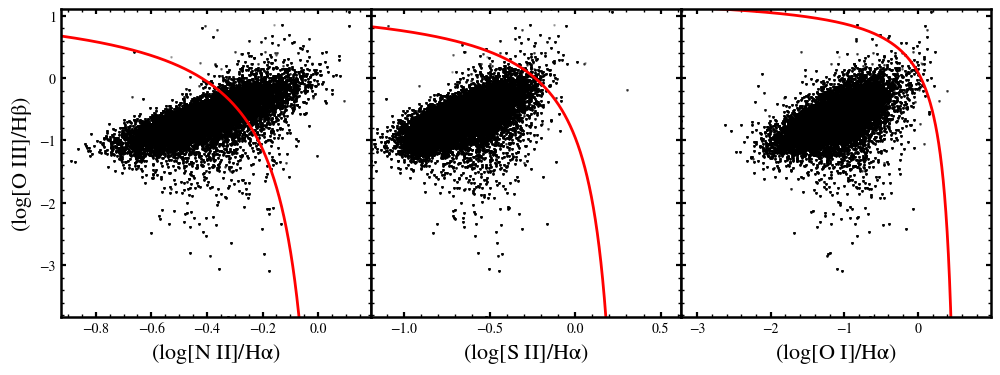

In [222]:
class_map = BPT(map_fil,fig_output=None)

In [223]:
class_map.shape

(326, 326, 3)

In [233]:
color_hex = {
        'star-forming': '#77a9d4', # blue
        'composite': '#ebebf0', # white
        'seyfert': '#fad12c', # yellow
        'liners': '#333652', # dark blue
        'unk': '#000000'
    }

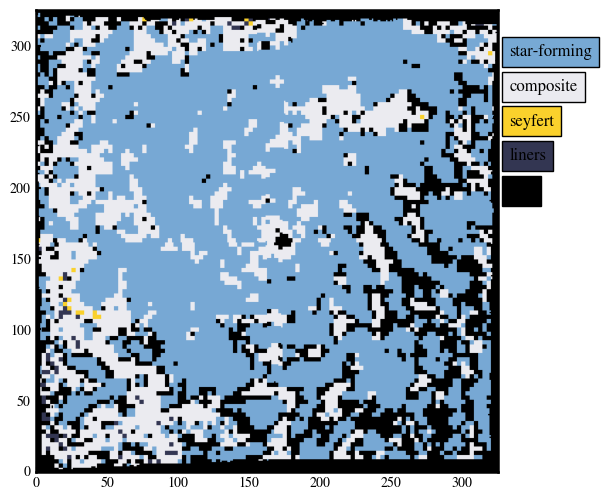

In [240]:
fig, ax = plt.subplots(1)
ax.imshow(class_map,origin='lower')

shift = 0
for cat in color_hex.keys():
    x = 1.025
    y = 0.9
    ax.text(x, y-shift, cat, fontsize='large', transform=ax.transAxes, bbox={'facecolor':color_hex[cat],'pad':5})
    shift += 0.075

In [244]:
(binid.shape[0] * .2)/2

32.6

In [248]:
cube.info()

Filename: data/NGC4030/cube/NGC4030-SQUARE0.6/BETA-CORR/SQUARE0.6-MILESHC-MASTARHC2-NOISM/1/1/manga-1-1-LOGCUBE-SQUARE0.6-MILESHC-MASTARHC2-NOISM.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1373   ()      
  1  FLUX          1 ImageHDU        45   (326, 326, 4009)   float32   
  2  IVAR          1 ImageHDU        46   (326, 326, 4009)   float32   
  3  MASK          1 ImageHDU        45   (326, 326, 4009)   int16   
  4  LSF           1 ImageHDU        43   (326, 326, 4009)   float32   
  5  WAVE          1 ImageHDU         9   (4009,)   float32   
  6  REDCORR       1 ImageHDU         9   (4009,)   float32   
  7  MODEL         1 ImageHDU        44   (326, 326, 4009)   float32   
  8  MODEL_MASK    1 ImageHDU        44   (326, 326, 4009)   int16   
  9  EMLINE        1 ImageHDU        43   (326, 326, 4009)   float32   
 10  STELLAR       1 ImageHDU        44   (326, 326, 4009)   float32   
 11  STELLAR_MASK    1 ImageHDU       

In [7]:
mapfil = "data/NGC4030/maps/NGC4030_EW-Map.fits"
ewmap = fits.getdata(mapfil)

In [6]:
from bokeh.plotting import figure, show

In [ ]:
plot = figure()

In [10]:
region = 5880, 5910

wave = cube['WAVE'].data

In [11]:
inds = np.where((wave>=region[0]) & (wave<=region[1]))

In [12]:
inds

(array([1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272,
        1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283,
        1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291]),)

In [14]:
len(inds[0])

30